In [36]:
#Importing the necessary libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import sklearn as sk

In [37]:
#Download historical data from Yahoo Finance for Nasdaq Futures Index (Ticker NQ=F)
start = '2007-01-01'
end = '2023-12-01'
stock = 'NQ=F'
data = yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [38]:
#Look at the raw data downloaded
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,1780.50,1811.00,1747.00,1779.00,1779.00,500265
2007-01-04,1779.75,1816.50,1770.50,1812.25,1812.25,367214
2007-01-05,1812.75,1816.00,1785.75,1797.25,1797.25,353652
2007-01-08,1798.00,1812.25,1792.25,1803.50,1803.50,267087
2007-01-09,1803.75,1818.75,1792.00,1810.50,1810.50,355926
...,...,...,...,...,...,...
2023-11-24,16036.75,16086.50,15981.75,16021.00,16021.00,296604
2023-11-27,16008.00,16089.25,15938.75,16008.75,16008.75,502555
2023-11-28,16005.25,16071.50,15945.25,16048.00,16048.00,598224


In [39]:
#Sustitute values in Date column for consecutive numbers for NN to be able to learn from this data
data.reset_index(inplace=True)

In [40]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-01-03,1780.50,1811.00,1747.00,1779.00,1779.00,500265
1,2007-01-04,1779.75,1816.50,1770.50,1812.25,1812.25,367214
2,2007-01-05,1812.75,1816.00,1785.75,1797.25,1797.25,353652
3,2007-01-08,1798.00,1812.25,1792.25,1803.50,1803.50,267087
4,2007-01-09,1803.75,1818.75,1792.00,1810.50,1810.50,355926
...,...,...,...,...,...,...,...
4252,2023-11-24,16036.75,16086.50,15981.75,16021.00,16021.00,296604
4253,2023-11-27,16008.00,16089.25,15938.75,16008.75,16008.75,502555
4254,2023-11-28,16005.25,16071.50,15945.25,16048.00,16048.00,598224
4255,2023-11-29,16055.50,16208.50,16013.50,16023.75,16023.75,634326


In [41]:
#Introducing a moving average of 100 days as a variable
ma_100_days=data.Close.rolling(100).mean()

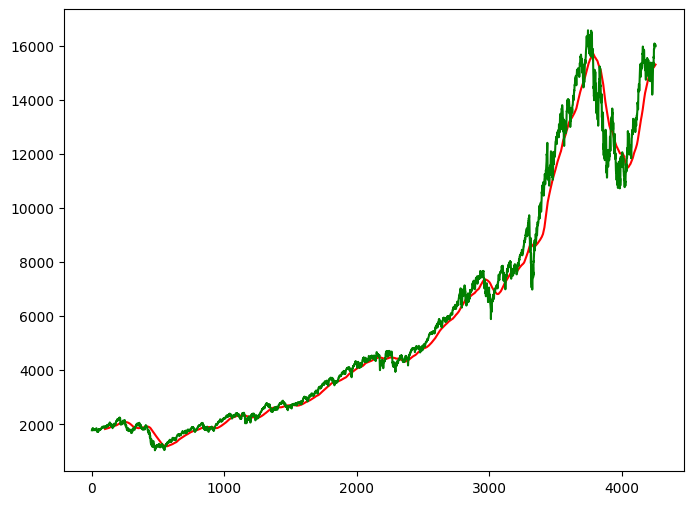

In [42]:
#Plotting a graph where a 100 days moving average is plotted in red and is overlayed with actual data (Closing prices) plotted in green
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close, 'g')
plt.show()

In [43]:
#Introducing a moving average of 200 days as a variable
ma_200_days=data.Close.rolling(200).mean()

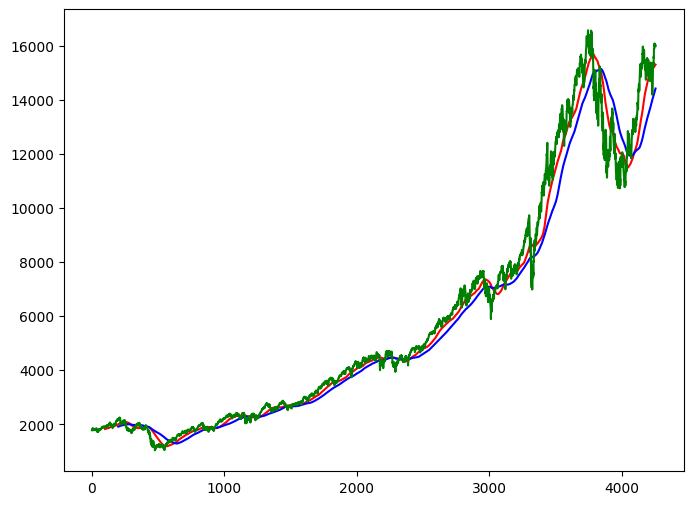

In [44]:
#Plotting both moving averages (100 and 200 days) overlayed by the actual data (Closing prices) from the dataset
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close, 'g')
plt.show()

In [45]:
#Cleaning out all rows that have 0 data
data.dropna(inplace=True)

In [46]:
#Slicing the dataset into training and test subsets (80/20) by putting it into new dataframes and assigning them names using pandas.
#Training data
data_train=pd.DataFrame(data.Close[0: int(len(data)*0.80)])
#Test_data
data_test=pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [47]:
#Initially there is 4257 rows of data.Checking the train subset
data_train.shape[0]

3405

In [48]:
#Initially there is 4257 rows of data. Checking the test subset.
data_test.shape[0]

852

In [49]:
#Normalising initial dataset features 
#Setting parameters of scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [50]:
#Normalising training dataset features
data_train_scale=scaler.fit_transform(data_train)

In [51]:
#Using first 100 days to calculate next 100 days price
x = []
y = []
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [52]:
#Converting x and y to arrays
x, y = np.array(x), np.array(y)

In [53]:
#Importing modelling tools
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [54]:
#Creating the model
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 80, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [55]:
#Compilind the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [56]:
#Fitting the model
model.fit(x,y, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
104/104 [==============================] - 16s 118ms/step - loss: 0.0181
Epoch 2/50
104/104 [==============================] - 12s 119ms/step - loss: 0.0054
Epoch 3/50
104/104 [==============================] - 12s 118ms/step - loss: 0.0047
Epoch 4/50
104/104 [==============================] - 12s 118ms/step - loss: 0.0039
Epoch 5/50
104/104 [==============================] - 12s 120ms/step - loss: 0.0034
Epoch 6/50
104/104 [==============================] - 12s 119ms/step - loss: 0.0031
Epoch 7/50
104/104 [==============================] - 12s 119ms/step - loss: 0.0028
Epoch 8/50
104/104 [==============================] - 12s 118ms/step - loss: 0.0032
Epoch 9/50
104/104 [==============================] - 12s 120ms/step - loss: 0.0027
Epoch 10/50
104/104 [==============================] - 12s 120ms/step - loss: 0.0026
Epoch 11/50
104/104 [==============================] - 12s 120ms/step - loss: 0.0025
Epoch 12/50
104/104 [==============================] - 13s 120ms/step - lo

In [74]:
#Model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_8 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_9 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_9 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_10 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_11 (LSTM)              (None, 80)               

In [58]:
#testing the model
past_100_days = data_train.tail(100)

In [59]:
#Concatinanting testing subset
data_test = pd.concat([past_100_days, data_test], ignore_index = True)

In [75]:
#Checking the subset
data_test

,Close
0,9091.00
1,8854.25
2,8850.25
3,8382.75
4,8454.00
...,...
947,16021.00
948,16008.75
949,16048.00
950,16023.75


In [60]:
#Normalising the tesing subset
data_test_scale  =  scaler.fit_transform(data_test)

In [61]:
#Using 100 days to test the model
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [62]:
#Predicting the closing price
y_predict = model.predict(x)

27/27 [==============================] - 1s 36ms/step


In [63]:
scale =1/scaler.scale_

In [64]:
y_predict = y_predict*scale

In [65]:
y = y*scale

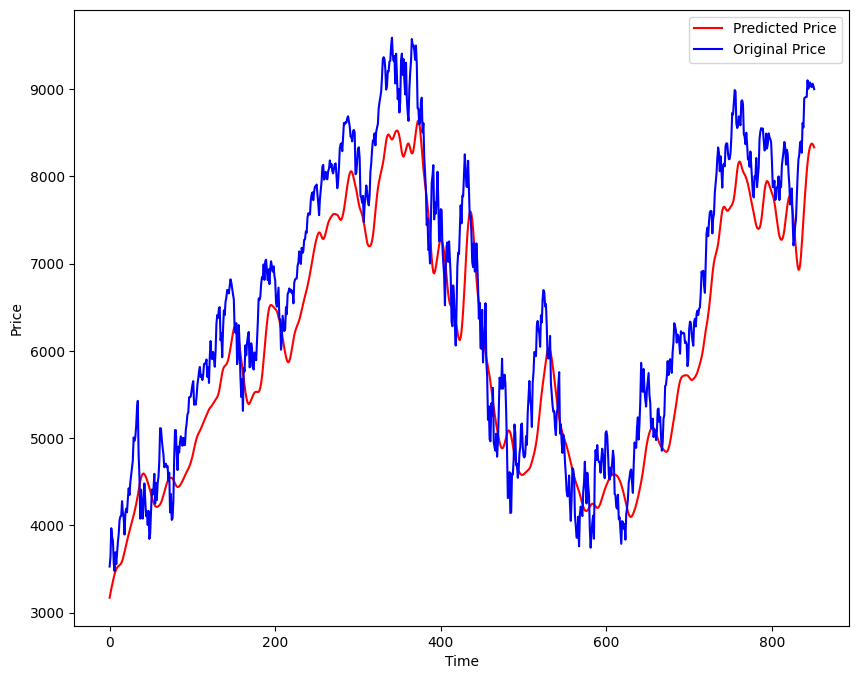

In [73]:
#Plotting predicteed price vs original price
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'b', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [69]:
model.save('Stock_Predictions_Model.keras')